In [49]:
import numpy as np
from random import random
from qiskit import *
from math import pi
import matplotlib.pyplot as plt

from qiskit.tools.visualization import plot_histogram
from qiskit_aer.primitives import Sampler

In [50]:
nq = 2
m = 2
q = QuantumRegister(nq, 'q')
c = ClassicalRegister(m, 'c')

qc_S = QuantumCircuit(q,c)

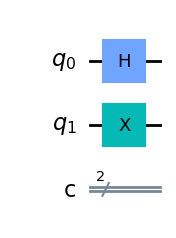

In [51]:
qc_S.h(0)
qc_S.x(1)
qc_S.draw('mpl')

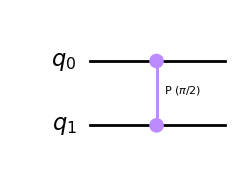

In [52]:
cu_circ = QuantumCircuit(2)
cu_circ.cp(pi/2, 0, 1)
cu_circ.draw('mpl')

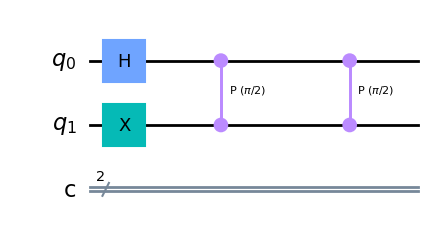

In [53]:
# Applying 2^k times, which is 2 here
for _ in range(2 ** (m - 1)):
    qc_S.cp(pi/2, 0, 1)

qc_S.draw('mpl')

In [54]:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)

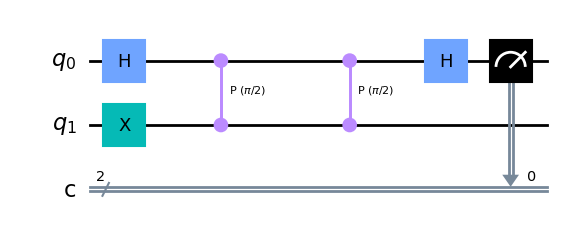

In [55]:
x_measurement(qc_S, q[0], c[0])
qc_S.draw('mpl')

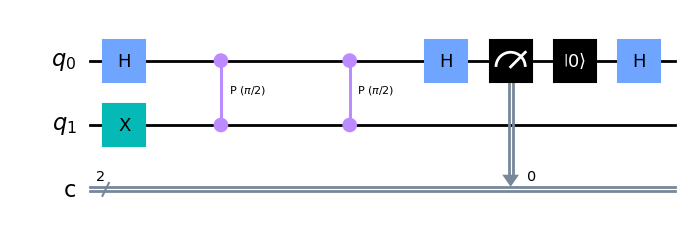

In [56]:
# Initialization with reset, recycle the qubit
qc_S.reset(0)
qc_S.h(0)
qc_S.draw('mpl')

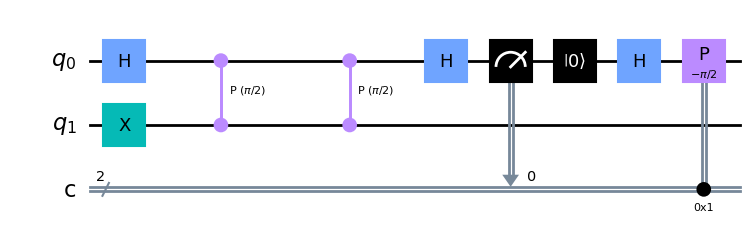

In [57]:
qc_S.p(-pi/2, 0).c_if(c, 1)
qc_S.draw('mpl')

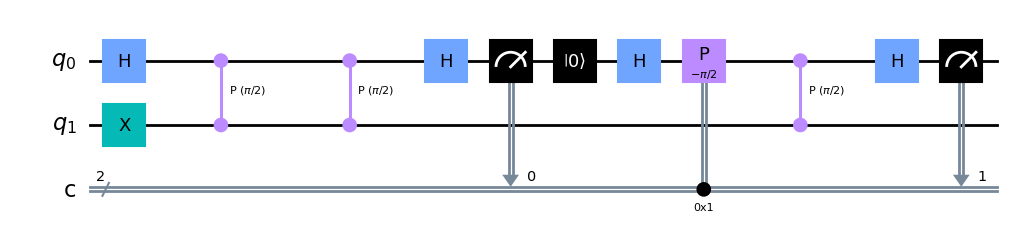

In [58]:
## 2^t c-U operations (with t=m-2), so this is just 2 times
for _ in range(2 ** (m - 2)):
    qc_S.cp(pi/2, 0, 1)

x_measurement(qc_S, q[0], c[1]) 
qc_S.draw('mpl')

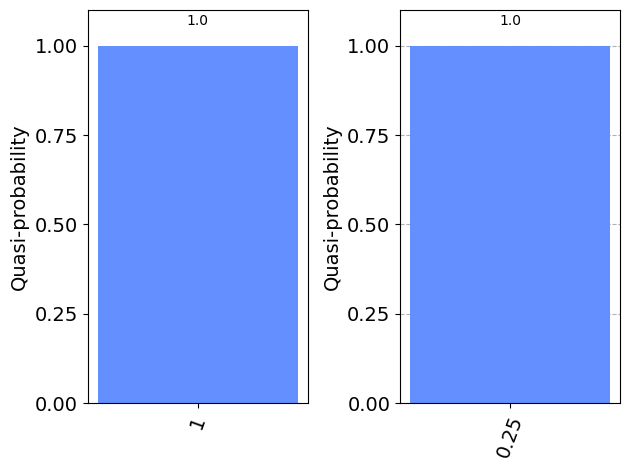

In [59]:
sampler = Sampler()

job = sampler.run(qc_S)
result = job.result()

dist0 = result.quasi_dists[0]

key_new = [str(key/2**m) for key in list(dist0.keys())]
dist1 = dict(zip(key_new, dist0.values()))

fig, ax = plt.subplots(1,2)
plot_histogram(dist0, ax=ax[0])
plot_histogram(dist1, ax=ax[1])
plt.tight_layout()